# ¿Qué es la Computación Cuántica?
La Computación Cuántica se refiere al uso de fenómenos de la mecánica cuántica como la superposición y el entrelazamiento para realizar cálculos. Para comprender los fenómenos cuánticos, es importante comprender el qubit , la unidad de información cuántica y los conceptos de superposición y entrelazamiento.

# ¿Qué es un Qubit?
Qubit o Quantum Bit es la unidad de información cuántica, análoga al 'bit' en la computación clásica. Para diferenciar entre un bit clásico y un qubit, se utiliza la notación de Dirac (notación de ket). Entonces, los qubits se representan como **|0〉** y **|1〉** y, a menudo, se leen como 'estado cero' y 'un estado'.

Un bit clásico puede tomar 2 valores: 0 o 1, mientras que un cúbit se representa mediante un vector de estado, además de poder tener estado cero y un estado puede tener ambos al mismo tiempo gracias a la propiedad de superposición.

# Superposición y el gato de Schrodinger

![0_IWLSnNN7jusbUnl0](https://user-images.githubusercontent.com/67438760/173253887-fb43fbd6-78d5-4598-8ef2-17167833727d.png)

Para conceptualizar lo que implica la superposición cuántica frecuentemente se recurre a la historia del gato de Schrodinger, la cual consiste en:

Hay un gato en una caja cerrada junto con una botella de veneno; Hay un martillo unido a una sustancia radiactiva, que tiene una probabilidad p de descomponerse en una hora. La configuración experimental se deja en reposo durante una hora.

¿Murió el gato cuando la sustancia radiactiva se descompuso, el martillo cayó sobre la botella de veneno rompiéndola o el gato sigue vivo porque la botella de veneno está intacta?

A menos que abramos la caja cerrada después de que haya transcurrido el tiempo experimental de una hora, ¡no hay forma de que podamos saber si el gato está vivo o muerto!

# Entrelazamiento

El entrelazamiento es un fenómeno físico que se produce cuando dos partículas están conectadas al punto que lo que sucede con una inmediatamente afecta a la otra, sin importar cuan grande sea la distancia entre ellas. El entrelazamiento es reproducido en laboratorios, aunque aún no se comprende cómo se produce.

Uno de los qubits más utilizados son los giros de fotones . Un fotón puede girar hacia arriba (un estado) o hacia abajo (estados cero). Si tenemos dos fotones entrelazados, entonces deben tener giros opuestos, si uno está arriba, el otro debe estar abajo.

# Puertas Cuánticas

### Puerta de identidad: 

Una puerta de identidad es una puerta de un solo qubit que conserva el estado del qubit. Es similar a los búferes en la computación clásica que usamos para mantener los valores de los bits que se usarán para cálculos posteriores cuando hay un retraso en el circuito.

![0_Ce2pPmZbEMiJG32Z](https://user-images.githubusercontent.com/67438760/173253904-ae36e8f8-4da0-4ed5-a8ab-94090448b6cf.gif)

### Puerta NOT
Si el estado del qubit de control es **|0〉** , entonces el estado del qubit entrante no se modifica
Si el estado del qubit controlador es **|1〉** , entonces el estado del qubit entrante se invierte .

![0_iCgUy2pnLOiEhMxa](https://user-images.githubusercontent.com/67438760/173253968-9e28e400-742e-48cf-90d4-a1db23b753f5.gif)

### Puerta NOT Controlada

![0_ezovlkP5KRVhY00K](https://user-images.githubusercontent.com/67438760/173253959-c4f6d727-0aaa-49f0-9353-0f88e8686115.gif)

Invierte los valores en base al estado del qubit de control

### Puerta Hadamard

![0_lnynjak-un_LGPo7](https://user-images.githubusercontent.com/67438760/173253984-f102c5f0-a2d1-49d8-9421-5f1609a0a677.jpeg)

Hadamard es una puerta de un qubit muy apropiada para generar superposición equiprobable, donde no se favorece ninguno de los estados básicos.
En general, cuando se comienza a construir un algoritmo cuántico, se establece un conjunto de qubits de inicialización en estado cero, pero se prepara el circuito para introducir los estados en superposición equiprobables con Hadamard.



# Requisitos
Podemos emplear el propio compositos de qiskit el cual permite crear circuitos sin escribir código en https://quantum-computing.ibm.com/composer

o mediante código, para este último caso:

Debemos instalar la libreria de Qiskit y matplotlib para visualizar gráficos

In [ ]:
!pip install qiskit
!pip install matplotlib

Además debemos crear una cuenta en https://quantum-computing.ibm.com/login, ir a "My Account" y copiar el API Token para poder acceder a los dispositivos de IBM Quantum

In [1]:
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
import matplotlib

IBMQ.save_account("INSERT_API_TOKEN")
# Loading your IBM Q account(s)
provider = IBMQ.load_account()


Los imports empleados son:

- QuantumCircuit: Contiene todas sus operaciones cuánticas; las instrucciones para el sistema cuántico
- Execute: Ejecuta tu circuito
- Aer: Maneja los backends del simulador
- qiskit.visualization: Permite la visualización de datos, como plot_histogram

# Creación de un circuito cuántico que obtenga las probabilidades de que se obtenga 00 o 11

Este código pone un qubit en superposición en un dispositivo real de computación cuántica.
Para ello y por orden:
- Creamos un circuito cuántico que actúe sobre el registro
- Añadimos una puerta Hadamard para inducir la superposición
- Añadimos una puerta NOT Controlada cuyo qubit de control es 0 y el objetivo es 1
- Asignamos una medición cuántica a los bits clásicos, el primer argumento indexa los qubits, el segundo los bits clásicos. El resultado de la medición del enésimo qubit se almacenará en el enésimo bit clásico.
- Empleamos el simulador "qasm_simulator"
- Ejecutamos el circuito para 100.000 veces
- Obtenemos y mostramos tanto el circuito como un grafico en base a las probabilidades obtendidas.


Total count for 00 and 11 are: {'00': 49892, '11': 50108}
     ┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1 


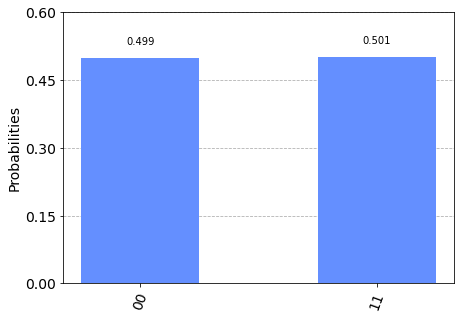

In [6]:
# Crear un circuito cuántico actuando sobre el registro q, para este caso solo emplearemos 2 QuantumRegister y 2 ClassicalRegister
#los cuales se pueden definir solo con QuantumCircuit
circuit = QuantumCircuit(2, 2)

# Añade una puerta H en el qubit 0
circuit.h(0)

# Añade una puerta CX (CNOT) en el qubit de control
# qubit 0 y objetivo qubit 1
circuit.cx(0, 1)

# Asignar la medición cuántica a los bits clásicos
circuit.measure([0,1], [0,1])

# Usar el qasm_simulador de Aer
simulator = Aer.get_backend('qasm_simulator')

# Ejecutar el circuito en el simulador qasm
job = execute(circuit, simulator, shots=100000)

# Obtener los resultados del trabajo
result = job.result()

# Devuelve los recuentos
counts = result.get_counts(circuit)
print("\nRecuento total para 00 y 11 son:",counts)

# Dibuja el circuito
print(circuit)

# Trazar un histograma
plot_histogram(counts)